In [3]:
import pandas  as pd 
import numpy as np  
import matplotlib.pyplot as plt 


In [4]:
# Import training set 
path=r"C:\Users\ladom\Desktop\LLm\data\Google_Stock_Price_Train.csv"
df=pd.read_csv(path)
training_set=df.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler 
# Feature Scaling
sc=MinMaxScaler(feature_range=(0,1)) 
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled



array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
# Creating a data structure with 60 timestamps and 1 output 
X_train=[] 
y_train=[] 
for v in range(60 ,1258): 
    X_train.append(training_set_scaled[v-60:v, 0]) 
    y_train.append(training_set_scaled[v, 0])
X_train, y_train =np.array(X_train), np.array(y_train)
print(X_train)
print(f"y_train {y_train}")

    
    

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
y_train [0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [7]:
# Reshaping
X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Part 2 bulding the RNN 

In [8]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 

# Initialising the RNN 
regressor=Sequential() 
# Add LSTM layers and some Dropout redularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50)) 
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

C:\Users\ladom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the RNN 
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [10]:
# Optimizing epochs and Batch Size 
regressor.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0391
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0057
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - loss: 0.0042
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0041
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0037
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1

# Part 3 Making the prediction and visualising the result

In [11]:
test_path=r"C:\Users\ladom\Desktop\LLm\data\Google_Stock_Price_Test.csv"
dataset_test=pd.read_csv(test_path)
real_stock_price=dataset_test.iloc[:, 1:2].values

In [12]:
dataset_total=pd.concat((df['Open'], dataset_test['Open']), axis=0) 
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [13]:
# Visualising the result 
X_test=[] 
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[794.4527 ],
       [791.6603 ],
       [792.72797],
       [794.02515],
       [797.28546],
       [803.1089 ],
       [807.4203 ],
       [808.079  ],
       [807.9012 ],
       [807.8585 ],
       [808.03217],
       [808.13635],
       [808.3041 ],
       [809.29565],
       [810.48914],
       [816.10034],
       [823.087  ],
       [829.7388 ],
       [831.99225],
       [825.5331 ]], dtype=float32)

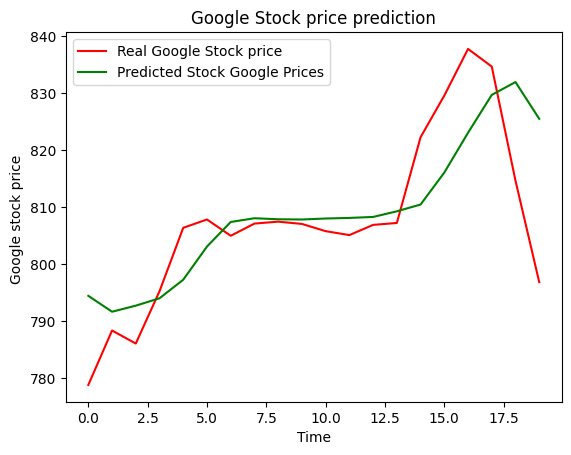

In [14]:
# Visualising the results 
plt.plot(real_stock_price, color='red', label='Real Google Stock price')
plt.plot(predicted_stock_price, color='green', label="Predicted Stock Google Prices")
plt.legend()
plt.title("Google Stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price ")
plt.show()

In [15]:
import math 
from sklearn.metrics import mean_squared_error 

rmse=math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

10.297942138172697


In [16]:
regressor.save("model_name.h5")

In [18]:
import joblib 
joblib.dump(sc, "scaler.pk1")

['scaler.pk1']